In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Dataset for regression: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices
* Dataset for clustering: https://www.kaggle.com/datasets/arshid/iris-flower-dataset

```
    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's
```

## Regression

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [53]:
boston = pd.read_csv('../data/boston-housing.csv')
boston = boston[boston.MEDV < 50]
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [54]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [55]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000,490.000000,490.000000,490.000000,490.000000,490.00000,490.000000
mean,3.643241,11.112245,11.113143,0.059184,0.554307,6.245471,68.27898,3.834519,9.514286,408.002041,18.520000,355.855449,12.92402,21.635918
std,8.722154,22.844626,6.821302,0.236209,0.116688,0.653147,28.16479,2.109948,8.691297,168.065190,2.110478,92.634273,7.08318,7.865301
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.90000,1.137000,1.000000,187.000000,12.600000,0.320000,1.98000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.881000,44.55000,2.111050,4.000000,280.250000,17.400000,375.912500,7.34750,16.700000
50%,0.247510,0.000000,9.690000,0.000000,0.538000,6.185000,76.80000,3.275900,5.000000,330.000000,19.100000,391.770000,11.67500,20.900000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.578000,93.87500,5.214600,24.000000,666.000000,20.200000,396.322500,17.11750,24.675000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.00000,12.126500,24.000000,711.000000,22.000000,396.900000,37.97000,48.800000


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

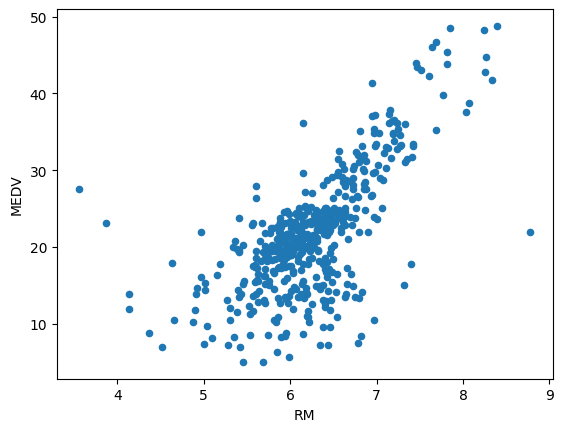

In [56]:
boston.plot.scatter(x='RM', y='MEDV')

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

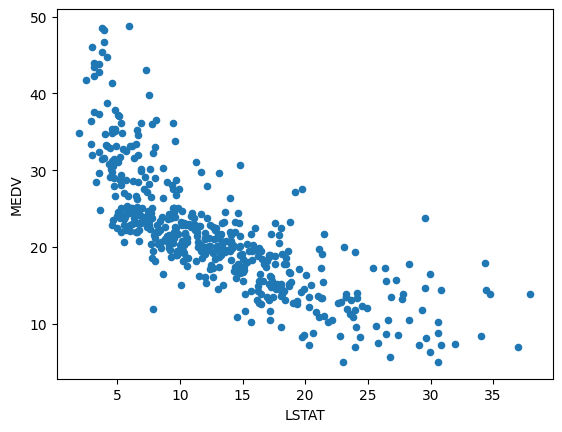

In [57]:
boston.plot.scatter(x='LSTAT', y='MEDV')

In [130]:
X = boston[['RM']]
y = boston.MEDV

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [132]:
regression = LinearRegression()

In [133]:
regression.fit(X_train, y_train)

LinearRegression()

In [135]:
regression.coef_, regression.intercept_

(array([8.85212726]), -33.79937025759759)

In [136]:
y_predicted = regression.predict(X_test)

In [137]:
r2_score(y_test, y_predicted)

0.26877222556751557

In [138]:
def abline(slope, intercept):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c='red')

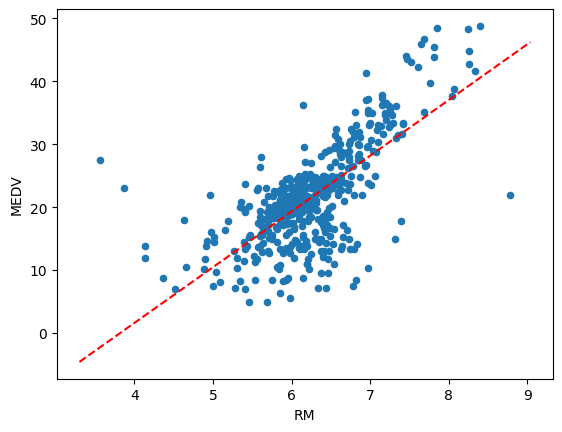

In [140]:
ax = boston.plot.scatter(x='RM', y='MEDV')

abline(regression.coef_, regression.intercept_)

## Clustering

In [168]:
from sklearn.cluster import KMeans

In [18]:
iris = pd.read_csv('../data/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [19]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [33]:
colors = {"Iris-virginica": "red", "Iris-setosa": "blue", "Iris-versicolor": "green"}

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

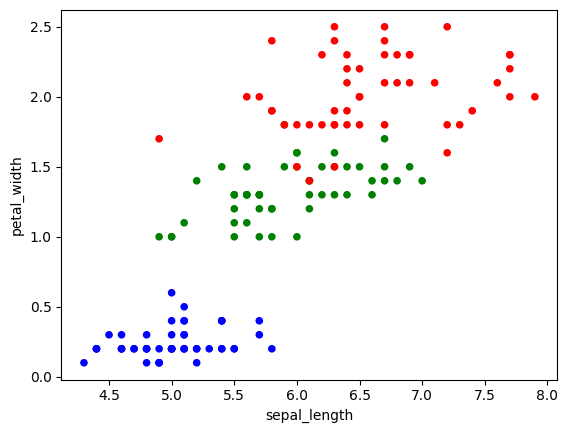

In [36]:
iris.plot.scatter(x='sepal_length', y='petal_width', c=iris.species.apply(lambda x: colors[x]))

In [143]:
X = iris[['sepal_length', 'petal_width']]

In [142]:
kmeans = KMeans(n_clusters=3)

In [145]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [146]:
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [175]:
int_colors = {1: 'yellow', 2: 'cyan', 0: 'magenta'}

In [162]:
kmeans.cluster_centers_

array([[6.84318182, 1.98409091],
       [5.00555556, 0.30185185],
       [5.86730769, 1.46538462]])

<AxesSubplot:xlabel='sepal_length', ylabel='petal_width'>

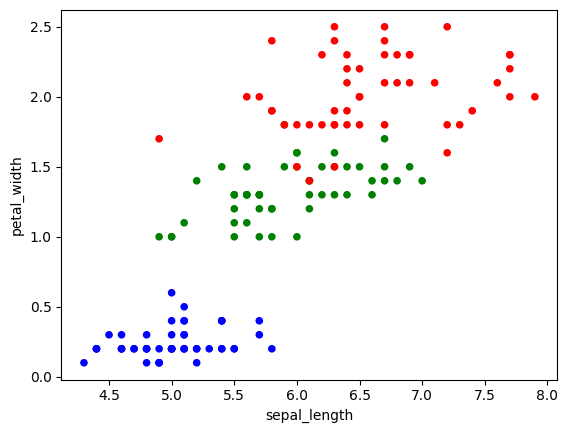

In [177]:
iris.plot.scatter(x='sepal_length', y='petal_width', c=iris.species.apply(lambda x: colors[x]))

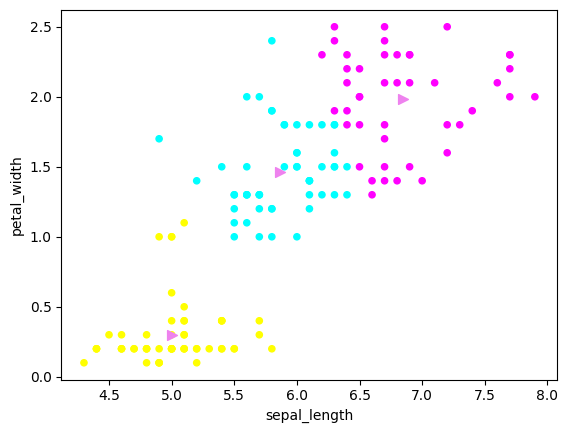

In [176]:
ax = iris.plot.scatter(x='sepal_length', y='petal_width', c=[int_colors[x] for x in kmeans.predict(X)])

for point in kmeans.cluster_centers_:
    ax.scatter(point[0], point[1], marker='>', c='violet', s=50)

In [170]:
kmeans.score(X, iris.species)

-32.75708171458172